In [1]:
from pylab import *

Soit $n \geq 3$, $\varepsilon >0$ et $A(\varepsilon)$ la matrice pentadiagonale définie par 
	$$A = \begin{pmatrix}
	1 & \varepsilon & \varepsilon^2  &  &  & \\
	\varepsilon & 1 & \varepsilon & \varepsilon^2     & &  \\
	 \varepsilon^2 & \ddots & \ddots & \ddots & & \\
	&   \ddots &  &  & \varepsilon  & \varepsilon^2 \\
	&  &  & \varepsilon &1  &\varepsilon \\
	& & & \varepsilon^2 & \varepsilon & 1 \\
\end{pmatrix}$$

In [2]:
def epsmatrice(n,epsilon):
    v = ones(n-1)*epsilon
    A=eye(n)+diag(v,-1)+diag(v,1)
    v = ones(n-2)*epsilon**2
    A = A + diag(v,-2) + diag(v,2)
    return A

def epsb(n,epsilon):
    v = ones(n)
    b = dot(epsmatrice(n,epsilon),v)
    return b

La matrice $A(\varepsilon)$ est à diagonale strictement dominante si et seulement si $1 > 2\varepsilon + 2\varepsilon^2 \iff \varepsilon \in \left[0 ; \frac{\sqrt{3}-1}{2} \right]$

In [3]:
epsilon_max = (sqrt(3)-1)/2
print(epsilon_max)

0.3660254037844386


In [4]:
def jacobi(A,b,x0,eps = 1e-5,maxiter=25):
    D = diag(A)
    M = diag(D)
    N = A - M
    x = x0
    k = 0                                                                                                                                                                        
    while norm(dot(A,x)-b)>eps and k<maxiter:
        x = (b - dot(N,x)) / D
        k = k+1
    return x,k

def rayonspectral(matrice):
    return max(abs(eigvals(matrice)))

In [5]:
n = 10
epsilon = 0.2
A = epsmatrice(n,epsilon)
b = epsb(n,epsilon)
x0 = zeros(n)
conditionnement = cond (A )
M = diag(diag(A))
N = M - A
B = dot(inv(M),N)
rho = rayonspectral(B)

sol, nb = jacobi(A,b,x0,1e-8,maxiter = 100)

In [6]:
print(sol)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
print(nb) #nombre d'itérations pour la méthode de Jacobi

26


In [8]:
n = 20
step = 0.01
liste_rayon = []
X = arange(0,1,step)
test = False
for epsilon in X:
    A = epsmatrice(n,epsilon)
    b = epsb(n,epsilon)
    M = diag(diag(A))
    N = M - A
    B = dot(inv(M),N)
    rho = rayonspectral(B)
    if test == False and rho > 1:
        eps_max = epsilon - step
        test = True
    liste_rayon.append(rho)

No handles with labels found to put in legend.


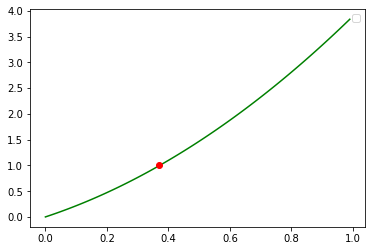

In [9]:
plot(X,liste_rayon,'g')
plot(eps_max,1,'ro')
xlabel = '$\varepsilon$'
legend()
show()

In [10]:
print(eps_max)

0.37


In [11]:
rayonspectral(epsmatrice(5,0.2))

1.3935466751393748

In [12]:
(sqrt(3)-1)/2

0.3660254037844386